# Lab 08: Cycle GANs and Pix2Pix

This lab will introduce CycleGANs and Pix2Pix. We will see how to use the code from the GitHub repositories
and also take a close look at the code. It is very useful when you are using these algorithms for your project.


st123012 Todsavad tangtortan

## Independent experiments

Do the following:

### 1. horse2zebra
Train a Cycle GAN on the `horses2zebras` dataset provided. Document your results in your report.

This implementation requires dominate and visdom for visualization. They enable monitoring the result of training via a Web server.

In [4]:
!pip install dominate visdom

In [6]:
# Set up my visdom
# On one terminal run:
#      python3 -m visdom.server
# On another terminal run:
#      unset http_proxy 
#      unset https_proxy
!env | grep proxy
!unset https_proxy
!unset http_proxy

https_proxy=http://192.41.170.23:3128
http_proxy=http://192.41.170.23:3128


In [7]:
### In terminal 1:
!python3 -m visdom.server

Checking for scripts.
It's Alive!
Traceback (most recent call last):
  File "/usr/lib/python3.8/runpy.py", line 194, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/usr/lib/python3.8/runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "/usr/local/lib/python3.8/dist-packages/visdom/server/__main__.py", line 16, in <module>
    download_scripts_and_run()
  File "/usr/local/lib/python3.8/dist-packages/visdom/server/run_server.py", line 236, in download_scripts_and_run
    main()
  File "/usr/local/lib/python3.8/dist-packages/visdom/server/run_server.py", line 220, in main
    start_server(
  File "/usr/local/lib/python3.8/dist-packages/visdom/server/run_server.py", line 55, in start_server
    app.listen(port, max_buffer_size=1024**3)
  File "/root/.local/lib/python3.8/site-packages/tornado/web.py", line 2134, in listen
    server.listen(
  File "/root/.local/lib/python3.8/site-packages/tornado/tcpserver.py", line 183, in listen
    sockets =

In [ ]:
### In terminal 2 (ssh with parameter -L 8097:localhost:8097 or let VSCode forward the port for you):
!cd pytorch-CycleGAN-and-pix2pix
!python3 train.py --dataroot ./datasets/horse2zebra --name horse2zebra_cyclegan --model cycle_gan --gpu_ids 3 > output_horse2zebra.txt

#### Result

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


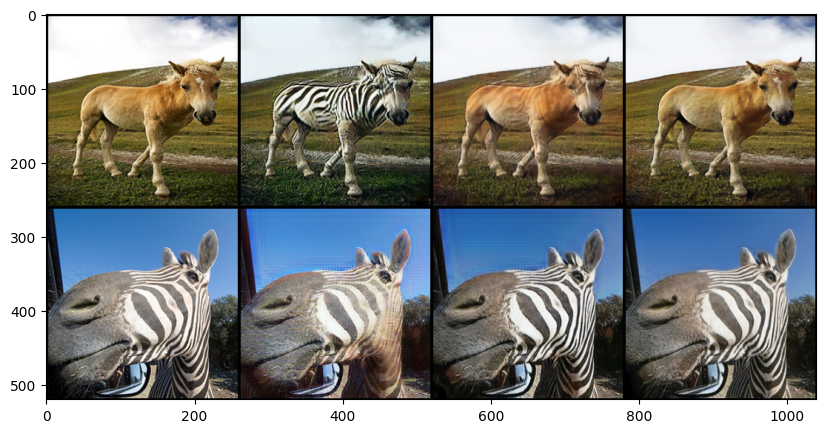

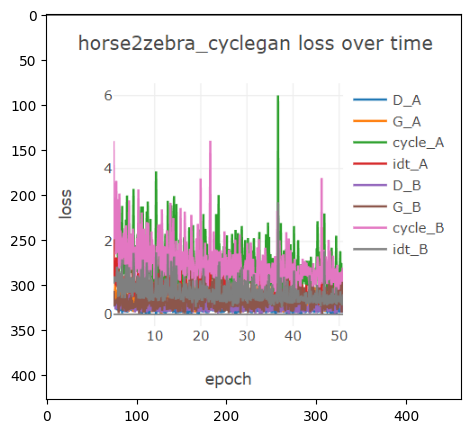

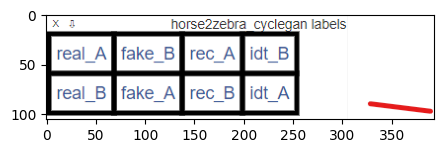

In [9]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('./figures/horse2zebra_cyclegan_images.jpg')
plt.figure(figsize = (10,5))
imgplot = plt.imshow(img)
plt.show()

img2 = mpimg.imread('./figures/horse2zebra_cyclegan_graph.png')
plt.figure(figsize = (10,5))
imgplot = plt.imshow(img2)
plt.show()

img3 = mpimg.imread('./figures/horse2zebra_cyclegan_labels.png')
plt.figure(figsize = (5,5))
imgplot = plt.imshow(img3)
plt.show()

#### Discussion
As shown above training with 50 epochs, it can be seen that the model is able to transform horse to zebra and vice versa. The resulting images and loss plots

### 2. ait2celeb
Create a new data set `aitict2celeba` consisting of AIT ICT faces and CelebA faces. Use the URLs for the datasets provided in class. Document your results in your report.


In [3]:
# import os 
# from sklearn.model_selection import train_test_split

# def load_dataset():
#     ait_ict_path = '../Datasets/ait-ict/'
#     celeba_align_path = '../Datasets/CelebA-Align/'
#     ait_files = [os.path.join(ait_ict_path, filename) for filename in os.listdir(ait_ict_path)]
#     celeba_files = [os.path.join(celeba_align_path, filename) for filename in os.listdir(celeba_align_path)]
#     trainA, testA = train_test_split(ait_files, test_size=0.3, random_state=555)
#     trainB, testB = train_test_split(celeba_files, test_size=0.3, random_state=555)
#     return trainA, testA, trainB, testB

In [4]:
# trainA, testA, trainB, testB = load_dataset()

In [24]:
# len(trainA), len(testA), len(trainB), len(testB)

In [ ]:
import shutil
import os

# folder path
ait_ict_path = '/root/Datasets/ait-ict'
ait_ict_list =  os.listdir(ait_ict_path)
number_files = len(ait_ict_list)
print('File count:', number_files)

celeba_folder = '/root/Datasets/CelebA-Align/'
results_folder = '/root/data/combined_A_B/'

train_A_folder = './data/ait2celeba/trainA/'
train_B_folder = './data/ait2celeba/trainB/'
test_A_folder = './data/ait2celeba/testA/'
test_B_folder = './data/ait2celeba/testB/'

celeba_img_list = os.listdir(celeba_folder)

for i in range(number_files):
    path_imgA = ait_ict_path + ait_ict_list[i]
    path_imgB = celeba_folder + celeba_img_list[i]
    if i < 240:
        # Copy ict to train_A
        shutil.copyfile(path_imgA, train_A_folder + ait_ict_list[i])
        # Copy celeb_A to train_B
        shutil.copyfile(path_imgB, train_B_folder + celeba_img_list[i])
    else:
        # Copy ict to test_A
        shutil.copyfile(path_imgA, test_A_folder + ait_ict_list[i])
        # Copy celeb_A to test_B
        shutil.copyfile(path_imgB, test_B_folder + celeba_img_list[i])

In [18]:
# python3 train.py --dataroot /root/lab07/data/ait2celeba --name ait2celeb_cyclegan --model cycle_gan > output_ait2celeb.txt

#### Result

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


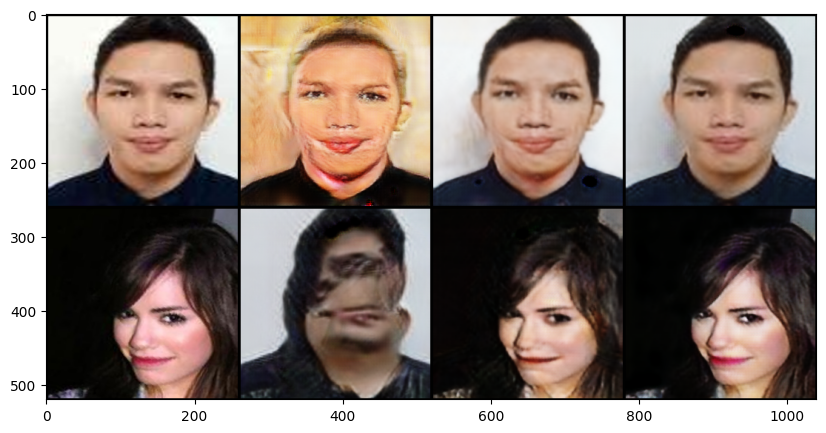

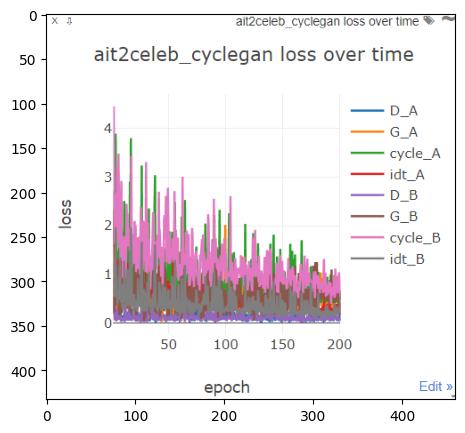

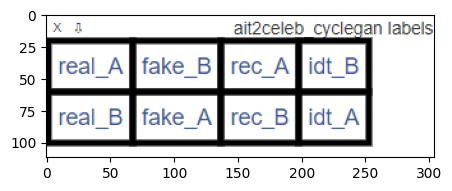

In [28]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('./figures/ait2celeba_cyclegan_images.jpg')
plt.figure(figsize = (10,5))
imgplot = plt.imshow(img)
plt.show()

img2 = mpimg.imread('./figures/ait2celeba_cyclegan_graph.png')
plt.figure(figsize = (10,5))
imgplot = plt.imshow(img2)
plt.show()

img3 = mpimg.imread('./figures/ait2celeba_cyclegan_labels.png')
plt.figure(figsize = (5,5))
imgplot = plt.imshow(img3)
plt.show()

#### Discussion

As shown above, after training for 200 epochs, despite, the convergence of losses, there is still room for improvement when look at the resulting images. This could be because the number of samples is less than that of horses2zebra.
